<a href="https://colab.research.google.com/github/ShivamSinghal1/FacialEmotionRecognition/blob/master/CK%2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential , load_model
from keras.layers import Convolution2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten, AveragePooling2D
from keras.initializers import  RandomNormal
from keras.layers import Conv2D,MaxPooling2D
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, TensorBoard ,EarlyStopping, ReduceLROnPlateau

import numpy as np
import pandas as pd

In [7]:
data_dir = "/content/drive/My Drive/Dataset/CK+48"
datagen = ImageDataGenerator(rescale=1. / 255,
                             shear_range=0.3,
                             zoom_range=0.2,
                             validation_split = 0.2,
                             horizontal_flip=True)
train_generator = datagen.flow_from_directory(data_dir,
                                              target_size=(224,224),
                                              batch_size=4,
                                              color_mode="rgb",
                                              subset="training",
                                              class_mode='categorical')
validation_generator = datagen.flow_from_directory(data_dir,
                                              target_size=(224,224),
                                              batch_size=4,
                                              color_mode="rgb",
                                              subset="validation",
                                              class_mode='categorical')

Found 788 images belonging to 7 classes.
Found 193 images belonging to 7 classes.


In [41]:
def get_cnn_model():
    model = Sequential()

    model.add(Convolution2D(64, (3, 1), padding='same', input_shape=(224,224,3)))
    model.add(Convolution2D(64, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Convolution2D(128, (3, 1), padding='same'))
    model.add(Convolution2D(128, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Convolution2D(256, (3, 1), padding='same'))
    model.add(Convolution2D(256, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Convolution2D(512, (3, 1), padding='same'))
    model.add(Convolution2D(512, (1, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
    model.add(Dropout(0.25))

    model.add(Flatten())

    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.25))

    model.add(Dense(7))
    model.add(Activation('softmax'))
    return model

In [42]:
model = get_cnn_model()

In [43]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 224, 224, 64)      640       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 224, 224, 64)      12352     
_________________________________________________________________
batch_normalization_6 (Batch (None, 224, 224, 64)      256       
_________________________________________________________________
activation_7 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 112, 112, 128)    

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])

In [45]:
model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
              metrics=['accuracy'])


# Saving model each time it achieves lower loss on the validation set
filepath='/content/drive/My Drive/Dataset/ck_vgg16.hdf5'
checkpointer = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=8,
                          verbose=1,
                          restore_best_weights=True, mode = 'auto'
                          )

reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.9,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)


history = model.fit(train_generator,
                    epochs=300,
                    validation_data=validation_generator,
                    callbacks=[checkpointer,earlystop,reduce_lr]
                             )

pd.DataFrame(history.history).to_csv("/content/drive/My Drive/Dataset/ck_history.csv")

Epoch 1/300
197/197 [==============================] - ETA: 0s - loss: 1.7863 - accuracy: 0.3807
Epoch 00001: val_loss improved from inf to 3.99712, saving model to /content/drive/My Drive/Dataset/ck_vgg16.hdf5
197/197 [==============================] - 25s 127ms/step - loss: 1.7863 - accuracy: 0.3807 - val_loss: 3.9971 - val_accuracy: 0.0518
Epoch 2/300
197/197 [==============================] - ETA: 0s - loss: 1.4328 - accuracy: 0.4734
Epoch 00002: val_loss improved from 3.99712 to 2.39830, saving model to /content/drive/My Drive/Dataset/ck_vgg16.hdf5
197/197 [==============================] - 21s 107ms/step - loss: 1.4328 - accuracy: 0.4734 - val_loss: 2.3983 - val_accuracy: 0.3368
Epoch 3/300
197/197 [==============================] - ETA: 0s - loss: 1.1897 - accuracy: 0.5876
Epoch 00003: val_loss improved from 2.39830 to 1.13648, saving model to /content/drive/My Drive/Dataset/ck_vgg16.hdf5
197/197 [==============================] - 37s 188ms/step - loss: 1.1897 - accuracy: 0.5876

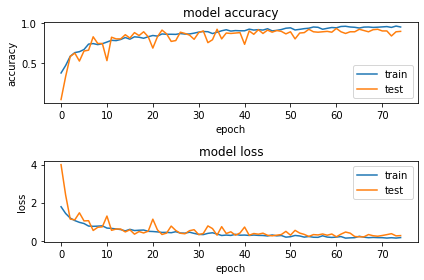

In [48]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:

def eval_model(history, model):
    batch_size = 32
    score = model.evaluate(X_test, Y_test, steps=(int)(len(X_test) / batch_size))
    print('Evaluation loss: ', score[0])
    print('Evaluation accuracy: ', score[1])
    # summarize history for accuracy
    plt.plot(history.history['acc'], color='b', label='Training')
    plt.plot(history.history['val_acc'], color='g', label='Validation')
    plt.title('Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(loc='upper left')
    plt.show()

    # summarize history for loss
    plt.plot(history.history['loss'], color='b', label='Training')
    plt.plot(history.history['val_loss'], color='g', label='Validation')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(loc='lower left')
    plt.show()
    y_pred = model.predict_classes(X_test)
    y_true = np.asarray([np.argmax(i) for i in Y_test])

    from sklearn.metrics import confusion_matrix
    import seaborn as sns

    cm = confusion_matrix(y_true, y_pred)
    cm_normalised = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.set(font_scale=1.5) 
    fig, ax = plt.subplots(figsize=(10,10))
    ax = sns.heatmap(cm_normalised, annot=True, linewidths=0, square=False, 
                        cmap="Greens", yticklabels=labels, xticklabels=labels, vmin=0, vmax=np.max(cm_normalised), 
                        fmt=".2f", annot_kws={"size": 20})
    ax.set(xlabel='Predicted label', ylabel='True label')

In [58]:
model.evaluate(validation_generator)
model.save('/content/drive/My Drive/Dataset/final_ck_vgg16.hdf5')

49/49 [==============================] - 2s 48ms/step - loss: 0.2240 - accuracy: 0.9223


In [8]:
model = load_model('/content/drive/My Drive/Dataset/final_ck_vgg16.hdf5')

In [9]:
model.evaluate(validation_generator)

49/49 [==============================] - 117s 2s/step - loss: 0.1931 - accuracy: 0.9119


[0.1931011974811554, 0.9119170904159546]

In [10]:
y_test = []
X_test = []
for i in range(0,49):
    X = validation_generator.__getitem__(i)[0]
    Y = validation_generator.__getitem__(i)[1]
    for y in Y:
      y_test.append(np.argmax(y))
    for x in X:
      X_test.append(x)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [11]:
y_predict = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [14]:
# Plot confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def create_confmat(true_labels, predicted_labels, columns, colour = 'Greens', size = (20,14)):
    
    cm = confusion_matrix(true_labels, predicted_labels) 
    cm_df = pd.DataFrame(cm,
    index = [col for col in columns], 
    columns = [col for col in columns])
    plt.figure(figsize=(18,16))
    sns.heatmap(cm_df, annot = True, cmap = colour, fmt='g', linewidths=.2)
    plt.title('Confusion Matrix', fontsize = 20)
    plt.ylabel('True label', fontsize = 18)
    plt.xlabel('Predicted label', fontsize = 18)
    plt.tick_params(axis='both', labelsize=14)
    plt.show()

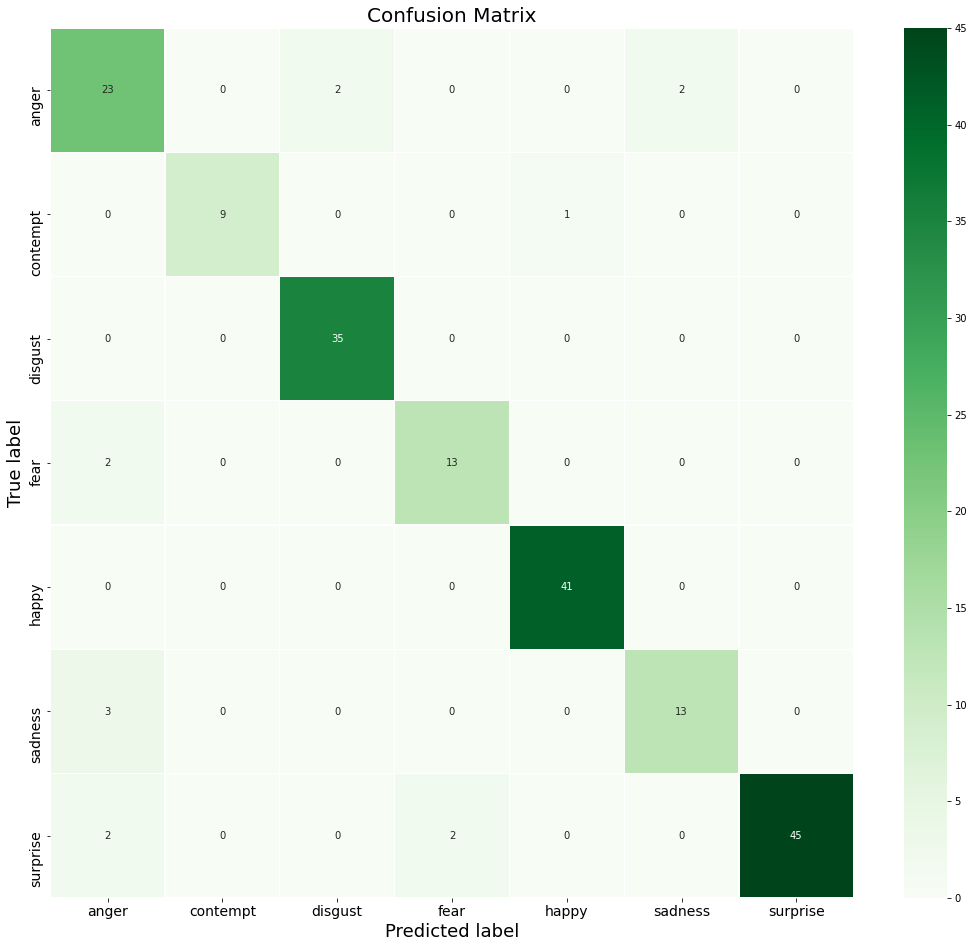

In [15]:
create_confmat(y_test , y_predict , ['anger' , 'contempt' , 'disgust' , 'fear' , 'happy' , 'sadness' , 'surprise'])

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test , y_predict))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        27
           1       1.00      0.90      0.95        10
           2       0.95      1.00      0.97        35
           3       0.87      0.87      0.87        15
           4       0.98      1.00      0.99        41
           5       0.87      0.81      0.84        16
           6       1.00      0.92      0.96        49

    accuracy                           0.93       193
   macro avg       0.92      0.91      0.91       193
weighted avg       0.93      0.93      0.93       193

